# Datasets in ``salad``

This is a test notebook that will later hold demos for a subpackage of `salad`

## Introduction 

Lorem ipsum dolor sit amet, consetetur sadipscing elitr, sed diam nonumy eirmod tempor invidunt ut labore et dolore magna aliquyam erat, sed diam voluptua. At vero eos et accusam et justo duo dolores et ea rebum. Stet clita kasd gubergren, no sea takimata sanctus est Lorem ipsum dolor sit amet. Lorem ipsum dolor sit amet, consetetur sadipscing elitr, sed diam nonumy eirmod tempor invidunt ut labore et dolore magna aliquyam erat, sed diam voluptua. At vero eos et accusam et justo duo dolores et ea rebum. Stet clita kasd gubergren, no sea takimata sanctus est Lorem ipsum dolor sit amet.

In [3]:
import torch
from torch import nn

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

## Digits Datasets

A standard benchmark for domain adaptation is digit classification. In ``salad.datasets``, it is easy to get access to this standard benchmark.

In [4]:
from salad.datasets import DigitsLoader
from salad.utils import panelize

We currently implemented unified loading functions for four different benchmarks.

In [5]:
from salad.datasets import MNIST, USPS, SVHN, Synth

mnist = MNIST('/tmp/data')
usps  = USPS('/tmp/data')
svhn  = SVHN('/tmp/data')
synth = Synth('/tmp/data')

Extracting /tmp/data/zip.train.gz
Extracting /tmp/data/synth_train_32x32.mat?raw=true


Accessing them is also possible directy by ``DigitsLoader``, which subclasses the usual ``torch.utils.data.DataLoader``:

In [6]:
dataset_names = ['mnist', 'usps', 'synth', 'svhn']
data = DigitsLoader('/tmp/data', dataset_names, shuffle=True, batch_size = 64, normalize=False)

Extracting /tmp/data/zip.train.gz
Extracting /tmp/data/synth_train_32x32.mat?raw=true
Using downloaded and verified file: /tmp/data/train_32x32.mat


In [7]:
for batch in data:
    
    for (x,y), name in zip(batch, dataset_names):
        
        print(name, x.size(), y.dtype, np.unique(y.numpy()))
    
    break

mnist torch.Size([64, 3, 32, 32]) torch.int64 [0 1 2 3 4 5 6 7 8 9]
usps torch.Size([64, 3, 32, 32]) torch.int64 [0 1 2 3 4 5 6 7 8 9]
synth torch.Size([64, 3, 32, 32]) torch.int64 [0 1 2 3 4 5 6 7 8 9]
svhn torch.Size([64, 3, 32, 32]) torch.int64 [0 1 2 3 4 5 6 7 8 9]


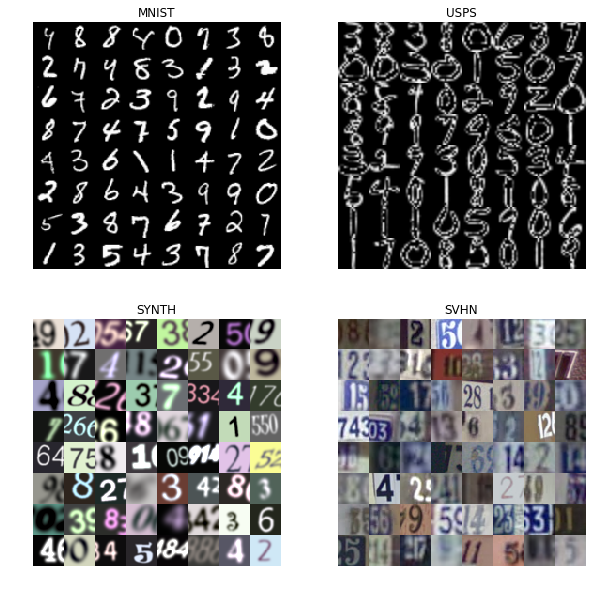

In [8]:
fig, axes = plt.subplots(2,2,figsize=(10,10))
axes = axes.flatten()

for batch in data:
    
    for (x,y), ax, name in zip(batch, axes, dataset_names):
        
        ax.imshow(panelize(x.numpy()))
        ax.set_title(name.upper())
        ax.axis('off')
        
    break
    
plt.show()

For training adaptation models, it is generally a good idea to normalize the images in some way prior to feeding them into a neural network.
``salad`` provide some means of doing this in a standardized way. In particular, it is easy to check statistics of the dataset:

In [4]:
default_normalization = {}

data_normalized = DigitsLoader('/tmp/data', dataset_names, shuffle=True, batch_size = 200, normalize = True)

for dataset in data_normalized.datasets:
    
    samples = np.concatenate([x.numpy() for x,_ in dataset])
    print(samples.mean(axis=(0,2,3)), samples.std(axis=(0,2,3)))

NameError: name 'DigitsLoader' is not defined

In [7]:
from salad.datasets import NoiseLoader
from salad.datasets.transforms import SaltAndPepper

loader = NoiseLoader('/tmp/data', 'synth', collate = 'stack',
                        noisemodels=[lambda x : x, SaltAndPepper(0.15)],
                        batch_size = 32, shuffle = True, normalize=False)

Extracting /tmp/data/synth_train_32x32.mat?raw=true
Extracting /tmp/data/synth_train_32x32.mat?raw=true


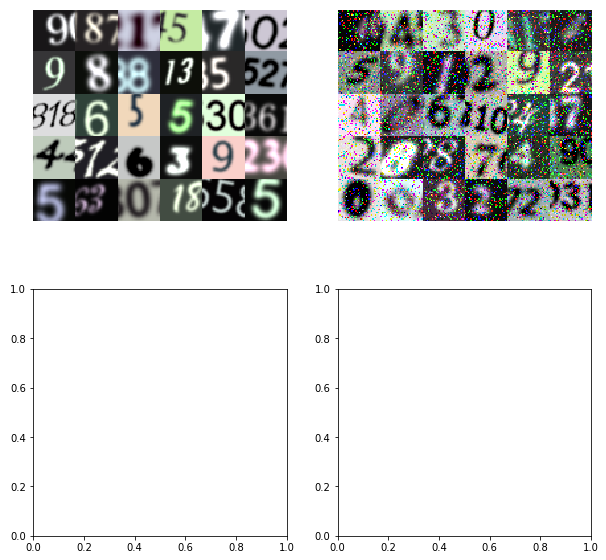

In [8]:
from salad.utils import panelize

fig, axes = plt.subplots(2,2,figsize=(10,10))
axes = axes.flatten()

for batch in loader:
    
    for (x,y), ax in zip(batch, axes):
        
        ax.imshow(panelize(x.numpy()))
        ax.axis('off')
        
    break
    
plt.show()

The normalization values can be found in ``salad.datasets.transforms``.

## Toy Datasets

The ``salad.datasets`` package also provides a loader for toy datasets.

In [7]:
from salad.datasets import ToyDatasetLoader

loader_stacked = ToyDatasetLoader(augment = False, collate='stack', batch_size = 2048, seed=1306)
loader_concat  = ToyDatasetLoader(augment = False, collate='cat', batch_size = 2048, seed=1306)

A stacked loader returns a tuples containing the return values of the individual datasets:

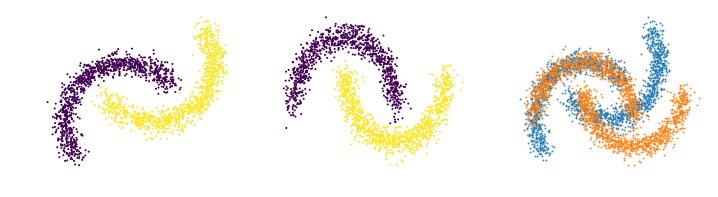

In [9]:
for (xs,ys), (xt,yt) in loader_stacked:
    
    plt.figure(figsize=(12,3))
    plt.subplot(1,3,1)
    plt.scatter(*xs.transpose(1,0), c = ys, s= 1)
    plt.axis('off')
    plt.subplot(1,3,2)
    plt.scatter(*xt.transpose(1,0), c = yt, s = 1)
    plt.axis('off')
    plt.subplot(1,3,3)
    plt.scatter(*xs.transpose(1,0), s=1, alpha = .75)
    plt.scatter(*xt.transpose(1,0), s=1, alpha = .75)  
    plt.axis('off')
    
    break

plt.show()